In [1]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.models.NBC_sklearn import NBC_sklearn
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [2]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "other"
dataset = "chameleon_t8_8k"
methods = ["NBC_TI", "NBC", "NBC_sklearn", "sklearn_kmeans"]
k = 40

## Loading benchmark dataset

In [3]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([7, 4, 5, 3, 6, 8, 2, 1])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [4]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC

In [5]:
%%time
model = NBC(k)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 2min 17s
Wall time: 2min 24s


## NBC-TI

In [6]:
%%time
model = NBC_TI(k)
results["NBC_TI"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 25.3 s
Wall time: 26.6 s


## NBC using sklearn.neighbors

In [7]:
%%time
model = NBC_sklearn(k)
results["NBC_sklearn"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 516 ms
Wall time: 334 ms


## Comparison

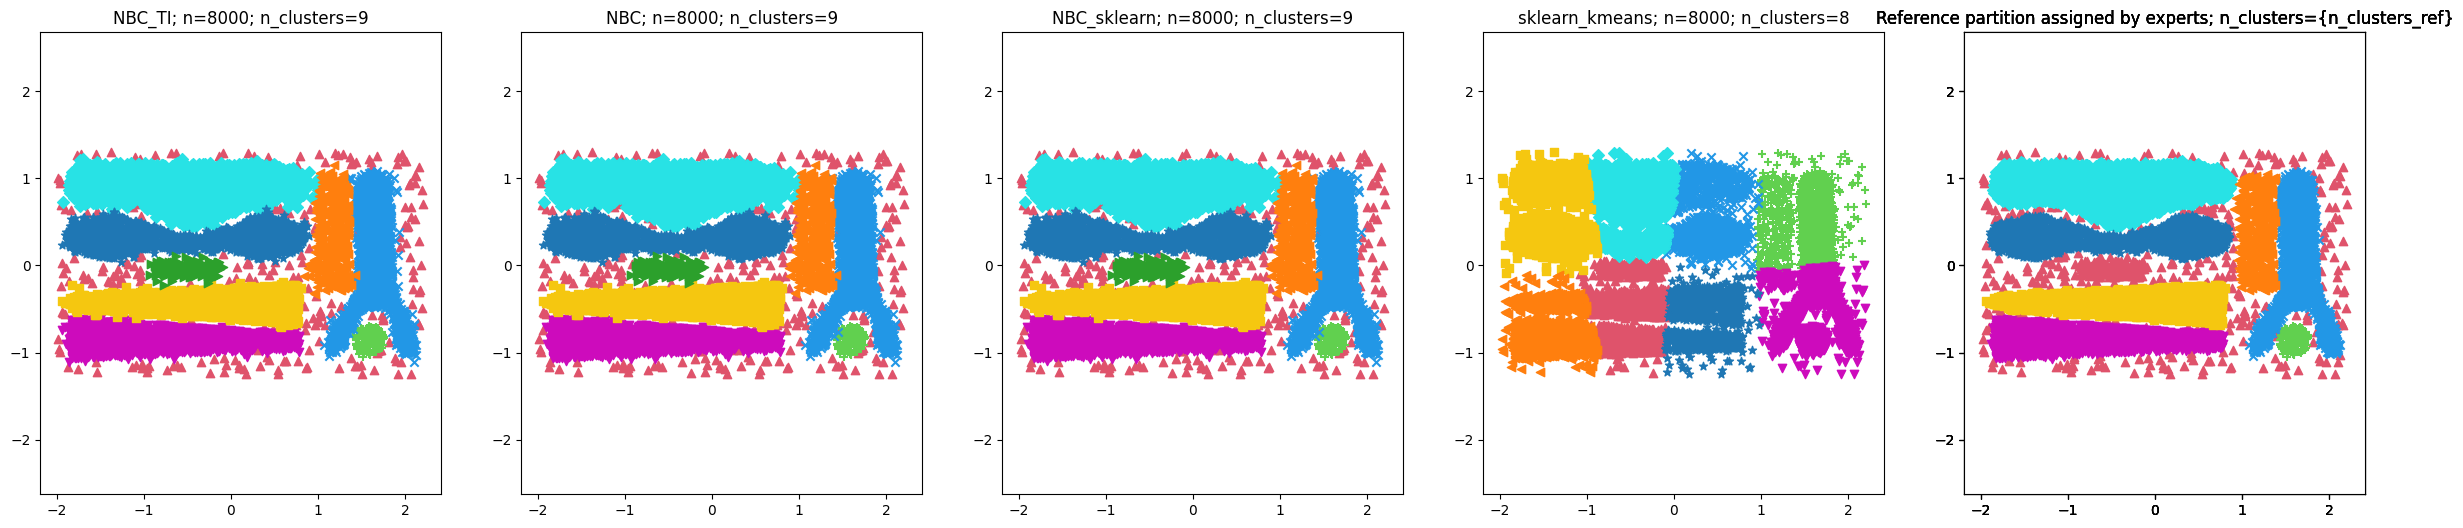

In [8]:
plot_results(benchmark.data, methods, results, reference)

In [9]:
confusion_matricies_table(methods, results, reference, title=f"Confusion matricies\nk={k}")

Confusion matricies
k=40
╒══════════════════════════════════════════════════╤══════════════════════════════════════════════════╤══════════════════════════════════════════════════╤═════════════════════════════════════╕
│ NBC_TI                                           │ NBC                                              │ NBC_sklearn                                      │ sklearn_kmeans                      │
│ [[ 218    1   20   21   22   20   26    9  184]  │ [[ 237    0   17   19   17   18   24    7  182]  │ [[ 237    0   17   19   17   18   24    7  182]  │ [[200  50  42  13  52  56  52  56]  │
│  [   5  176    0    0    0    0    0    0    0]  │  [   8  172    1    0    0    0    0    0    0]  │  [   8  172    1    0    0    0    0    0    0]  │  [  0   0   0   0 181   0   0   0]  │
│  [   1    0 1381    0    0    0    0    1    0]  │  [   1    0 1381    0    0    0    0    1    0]  │  [   1    0 1381    0    0    0    0    1    0]  │  [  0 692   0   0 691   0   0   0]  │
│  [   1  

In [10]:
measures(methods, results, reference, title=f"Measures\nk={k}")

Measures
k=40
╒══════════════════════════╤═════════════════════════╤═════════════════════════╤═══════════════════════════╕
│ NBC_TI                   │ NBC                     │ NBC_sklearn             │ sklearn_kmeans            │
│ ar: 0.9657921053872656   │ ar: 0.9664352058993763  │ ar: 0.9664352058993763  │ ar: 0.34471111029889145   │
│ r: 0.9907885048131017    │ r: 0.9909894674334292   │ r: 0.9909894674334292   │ r: 0.8396964620577572     │
│ fm: 0.971302938404825    │ fm: 0.9718029321807338  │ fm: 0.9718029321807338  │ fm: 0.4397393895486852    │
│ afm: 0.9658227252850404  │ afm: 0.9664423419499026 │ afm: 0.9664423419499026 │ afm: 0.3475773437782549   │
│ mi: 1.815885931553202    │ mi: 1.8178199418171512  │ mi: 1.8178199418171512  │ mi: 1.0824999874268728    │
│ nmi: 0.9435708479962055  │ nmi: 0.9428765829915163 │ nmi: 0.9428765829915163 │ nmi: 0.542193971697988    │
│ ami: 0.9434671603792276  │ ami: 0.9427718266219293 │ ami: 0.9427718266219293 │ ami: 0.5414885097979258   │
│ npa